In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB

# Chapter 4

In [76]:
df = pd.read_csv('Data-Auto.csv')
df.drop(df.columns[0], axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Q14a
Create a binary variable, mpg01 , that contains a 1 if mpg containsa value above its median, and a 0 if mpg contains a value belowits median. You can compute the median using the median()function. Note you may find it helpful to use the data.frame()function to create a single data set containing both mpg01 andthe other Auto variables.

In [77]:
df['mpg01'] = np.where(df.mpg > np.median(df.mpg), 1, 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [78]:
df.value_counts(df.mpg01)

mpg01
0    196
1    196
dtype: int64

# Q14b
Explore the data graphically in order to investigate the associ-ation between mpg01 and the other features. Which of the otherfeatures seem most likely to be useful in predicting mpg01? Scat-terplots and boxplots may be useful tools to answer this ques-tion. Describe your findings. 

In [79]:
features = ['mpg01', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

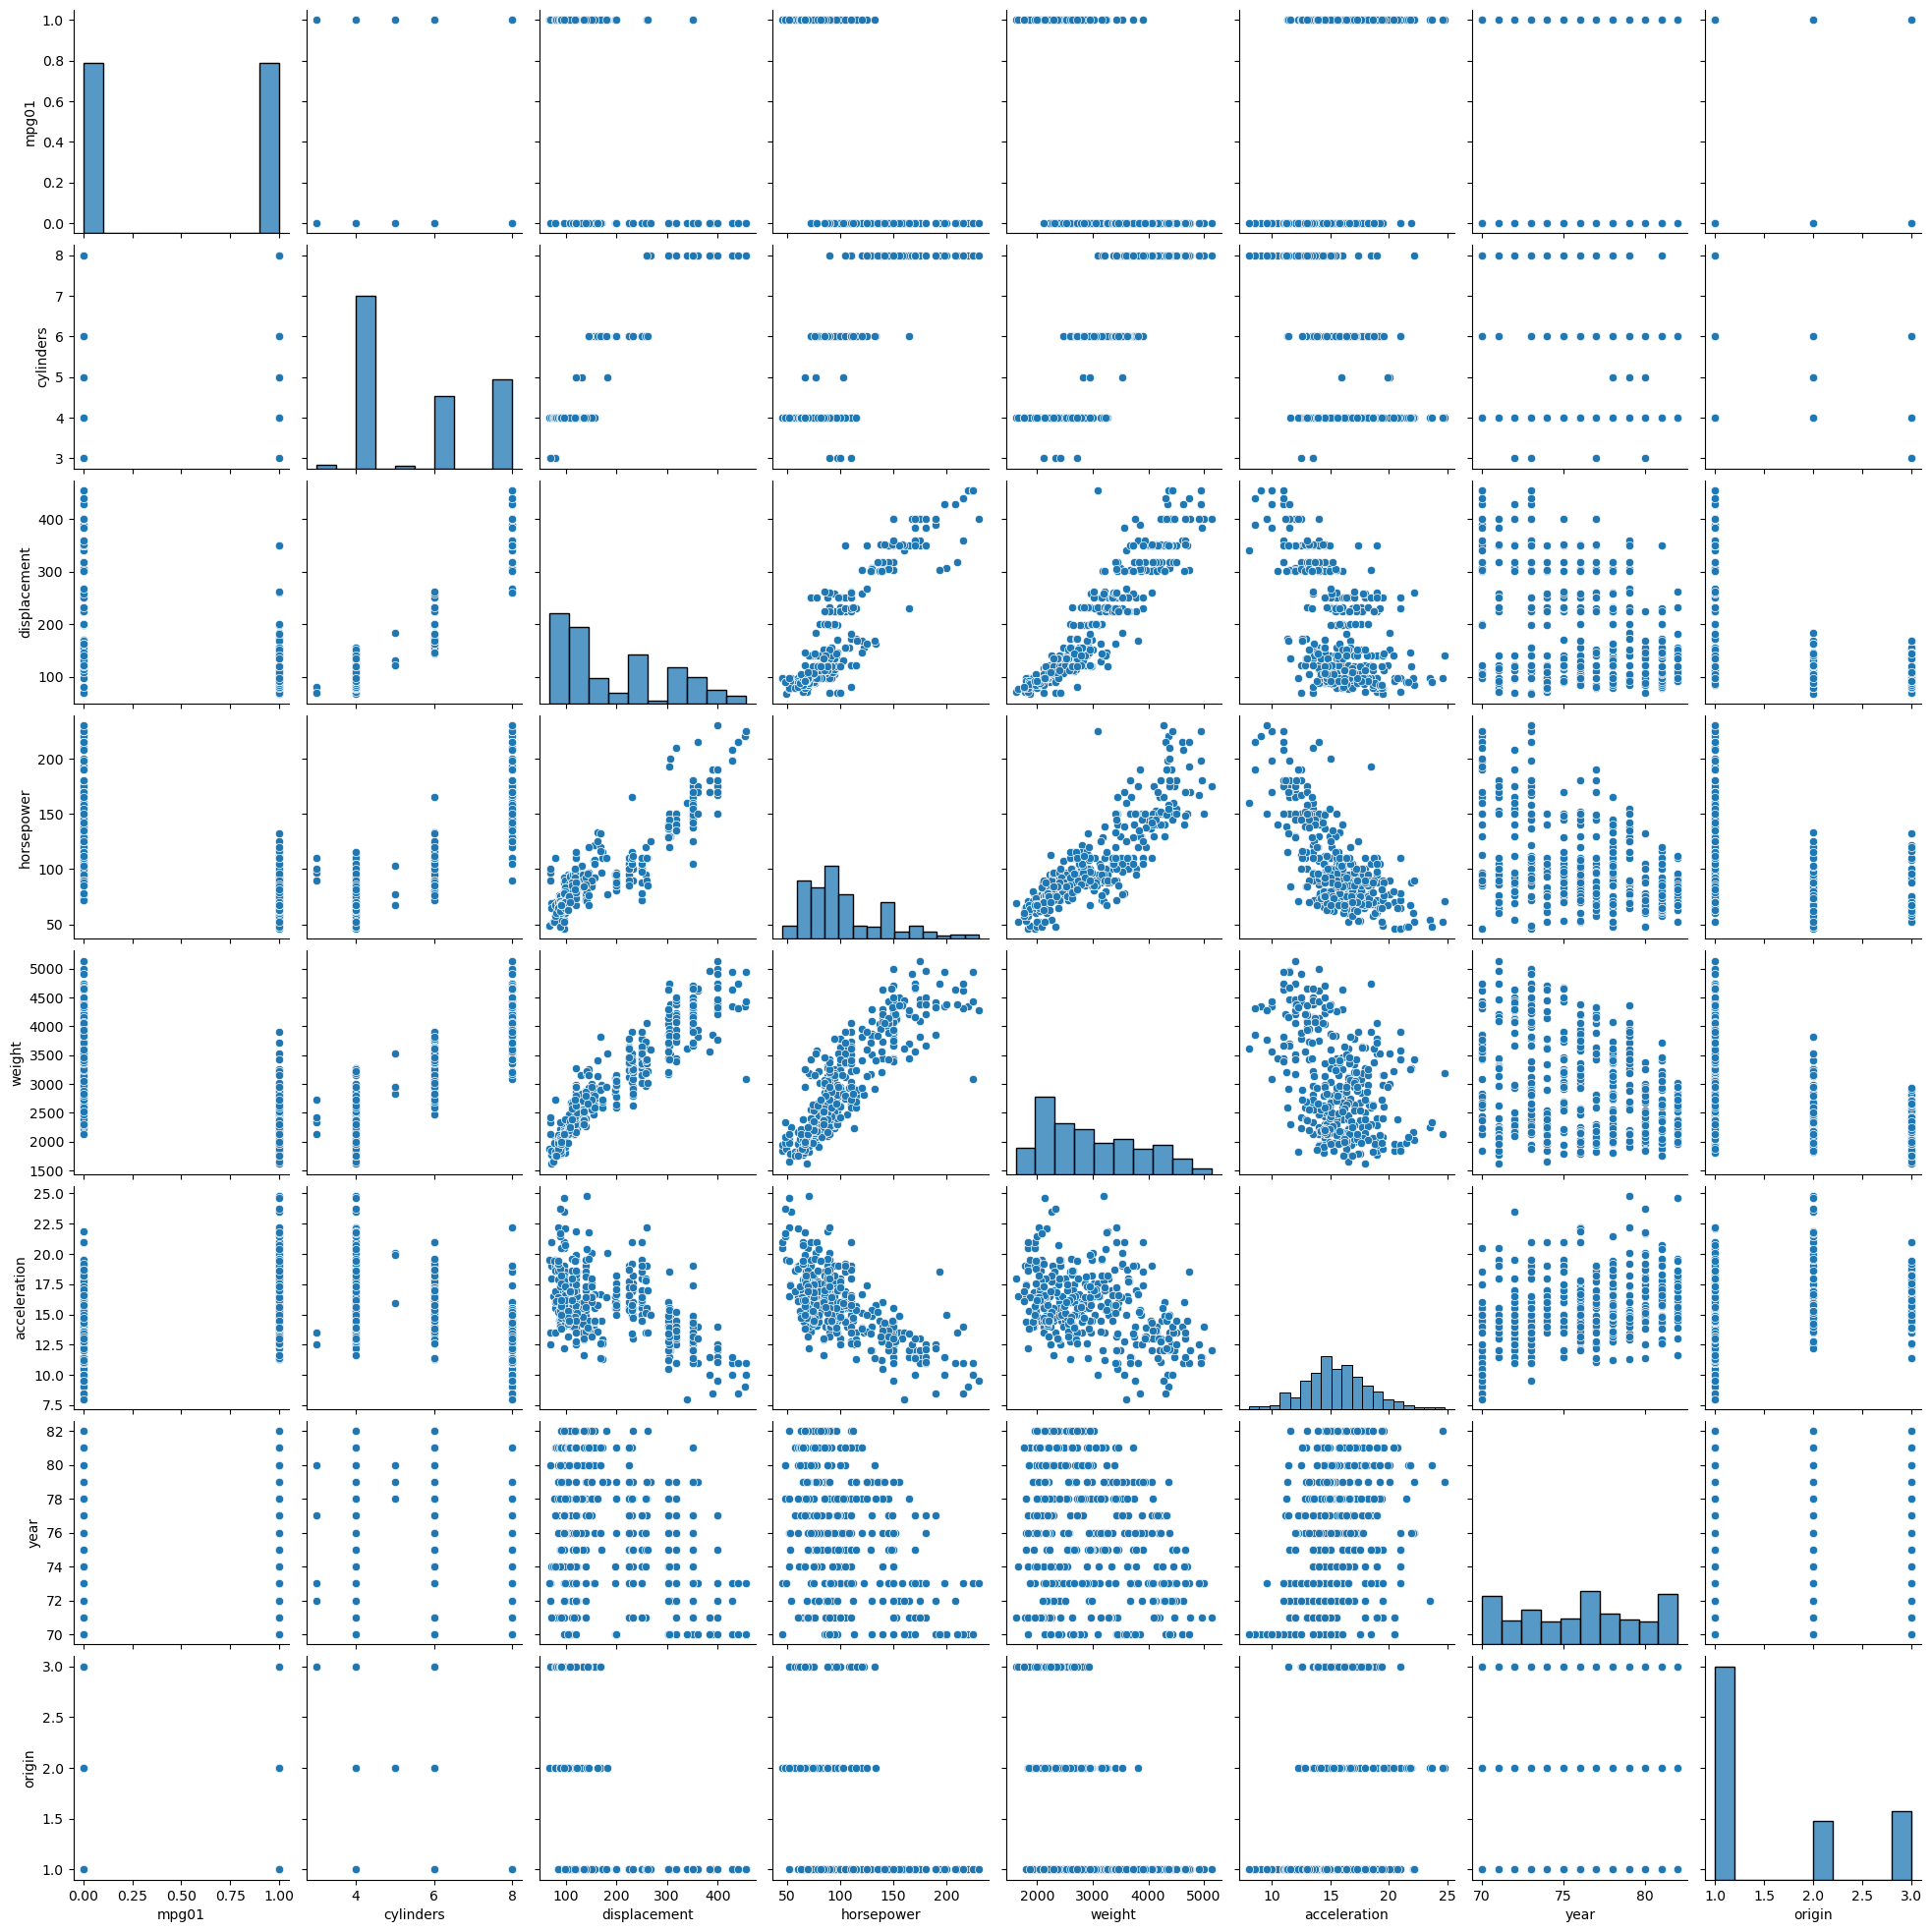

In [80]:
sns.pairplot(df, vars = features)

/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


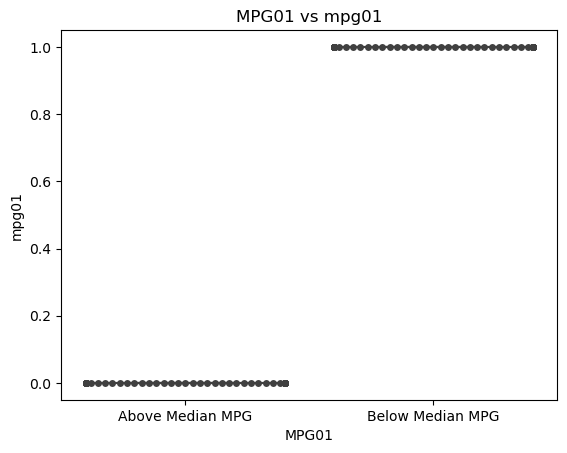

/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


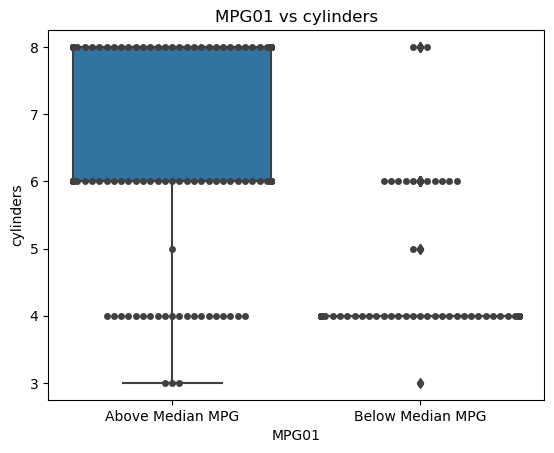

/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


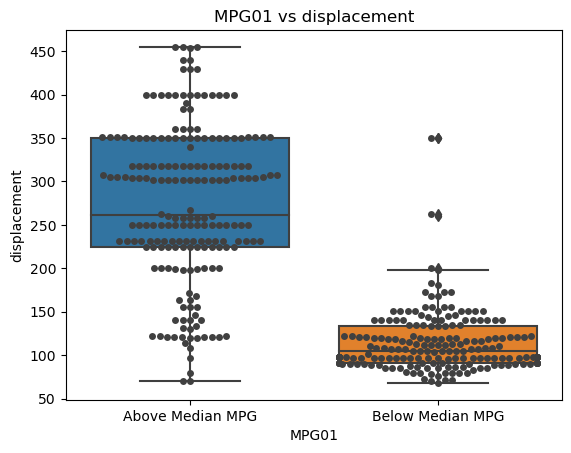

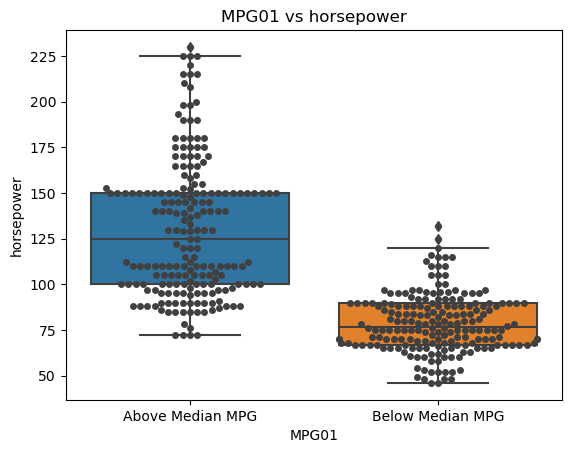

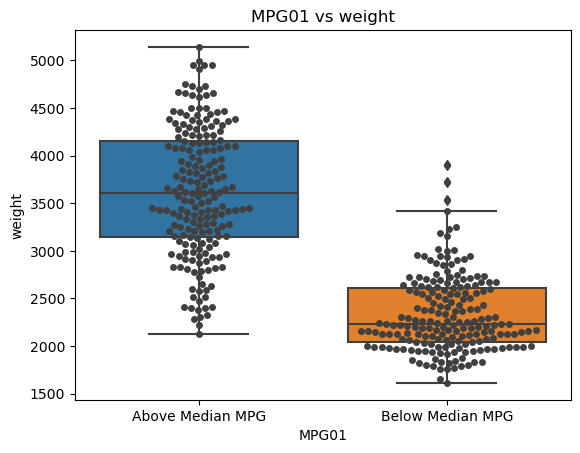

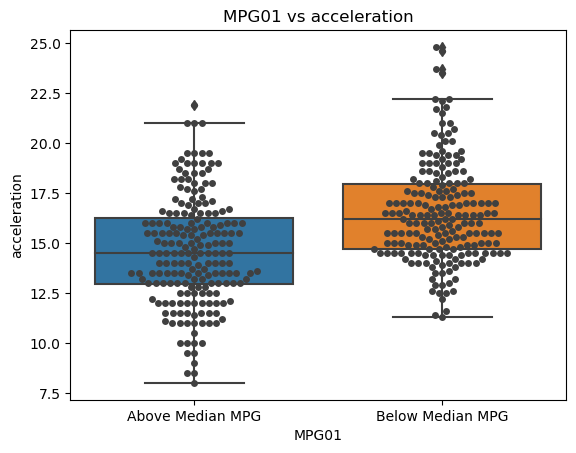

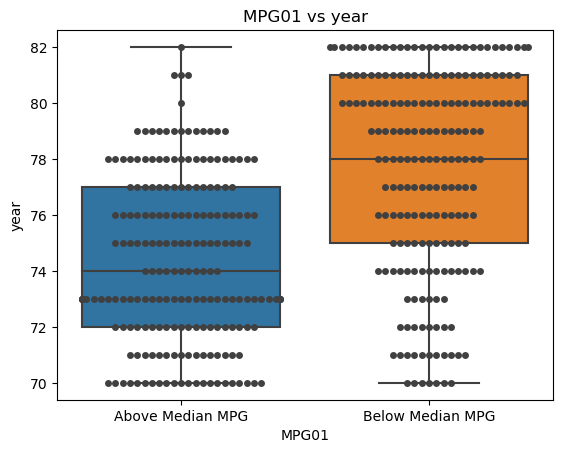

/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/anita/opt/anaconda3/envs/machine-learning-env/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 58.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


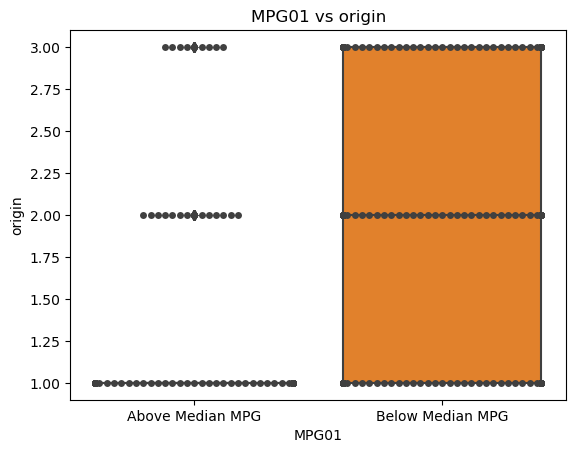

In [81]:
dv = df.mpg01
for feature in features:
    ax = sns.boxplot(x=df.mpg01, y=df[feature])
    ax = sns.swarmplot(x=df.mpg01, y=df[feature], color = '0.25')
    ax.xaxis.set_ticklabels(['Above Median MPG','Below Median MPG'])
    ax.set_xlabel('MPG01')
    ax.set_ylabel('%s'%feature)
    ax.set_title('MPG01 vs %s'%feature)
    plt.show()


# Q14C
Split the data into a training set and a test set.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(df[features[1:]], df["mpg01"], test_size=0.2, random_state=42)

In [83]:
# Sanity check... Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

,cylinders,displacement,horsepower,weight,acceleration,year,origin
258,6,225.0,110,3620,18.7,78,1
182,4,140.0,92,2572,14.9,76,1
172,6,171.0,97,2984,14.5,75,1
63,8,318.0,150,4135,13.5,72,1
340,4,86.0,64,1875,16.4,81,1


,cylinders,displacement,horsepower,weight,acceleration,year,origin
78,4,96.0,69,2189,18.0,72,2
274,4,121.0,115,2795,15.7,78,2
246,4,91.0,60,1800,16.4,78,3
55,4,91.0,70,1955,20.5,71,1
387,4,140.0,86,2790,15.6,82,1


258    0
182    1
172    0
63     0
340    1
Name: mpg01, dtype: int64

78     1
274    0
246    1
55     1
387    1
Name: mpg01, dtype: int64

# Q14d 
Perform LDA on the training data in order to predict mpg01using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

In [84]:
accuracies = {}

In [85]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [86]:
# Compute the accuracy
y_pred = lda_model.predict(X_test)
accuracies['LDA'] = accuracy_score(y_test, y_pred)

In [87]:
for model, accuracy in accuracies.items():
    print(model + " accuracy: " + str(round(accuracy, 4)*100) + "%")

LDA accuracy: 87.33999999999999%


# Q14e 
Perform QDA on the training data in order to predict mpg01using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

In [88]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [89]:
y_pred_q = qda_model.predict(X_test)
accuracies['QDA'] = accuracy_score(y_test, y_pred_q)

In [90]:
for model, accuracy in accuracies.items():
    print(model + " accuracy: " + str(round(accuracy, 4)*100) + "%")

LDA accuracy: 87.33999999999999%
QDA accuracy: 88.61%


# Q14f
Perform logistic regression on the training data in order to pre-dict mpg01 using the variables that seemed most associated withmpg01 in (b). What is the test error of the model obtained?

In [91]:
logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [92]:
# Predict the test set
y_pred_log = logisticRegr.predict_proba(X_test)
# Binary classification, so we only need one probability
y_pred_log = y_pred_log[: ,1]

In [93]:
# Compute the accuracy
accuracies['logit'] = accuracy_score(y_test, logisticRegr.predict(X_test))

In [94]:
for model, accuracy in accuracies.items():
    print(model + " accuracy: " + str(round(accuracy, 4)*100) + "%")

LDA accuracy: 87.33999999999999%
QDA accuracy: 88.61%
logit accuracy: 87.33999999999999%


# Q14g 
Perform naive Bayes on the training data in order to predictmpg01 using the variables that seemed most associated with mpg01in (b). What is the test error of the model obtained?

In [95]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [96]:
y_pred_bayes = gnb.predict(X_test)
accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred_bayes)

In [98]:
for model, accuracy in accuracies.items():
    print(model + " accuracy: " + str(round(accuracy, 2)*100) + "%")

LDA accuracy: 87.0%
QDA accuracy: 89.0%
logit accuracy: 87.0%
Naive Bayes accuracy: 87.0%


# Chapter 5

In [2]:
df2 = pd.read_csv("Data-Default.csv")
df2.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
df2["default"] = pd.Categorical(df2["default"])
df2.dtypes

default    category
student      object
balance     float64
income      float64
dtype: object

# Q5a

In [8]:
df2_dummy = df2.copy(deep=True)
df2_dummy.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [28]:
df2_dummy["default"] = np.where(df2["default"] == "Yes", 1, 0)
df2_dummy["student"] = np.where(df2["student"] == "Yes", 1, 0)
df2_dummy.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [29]:
log_reg = smf.logit('default ~ balance  + income', data = df2_dummy).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.4594
Time:                        16:12:01   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

# Q5b

In [35]:
split_accuracies = {}

In [30]:
# Sort our target and features into different dataframes
X = df2_dummy.drop(['default', 'student'], axis = 1)
y = df2_dummy['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check... Double check that the index of the train and test sets match
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

,balance,income
9069,0.000000,41239.020510
2603,961.999353,37073.192381
7738,655.611221,19039.168273
1579,864.047198,27690.113535
5058,1306.832034,57561.411261


,balance,income
6252,1435.662933,31507.089277
4684,771.789347,42139.070269
1731,0.000000,21809.218509
4742,113.571264,32803.832648
4521,1358.132472,49903.597081


9069    0
2603    0
7738    0
1579    0
5058    0
Name: default, dtype: int64

6252    0
4684    0
1731    0
4742    0
4521    0
Name: default, dtype: int64

In [32]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predict the test set
y_pred_log = logisticRegr.predict_proba(X_test)
# Binary classification, so we only need one probability
y_pred_log = y_pred_log[: ,1]

In [36]:
# Compute the accuracy
split_accuracies["first"] = accuracy_score(y_test, logisticRegr.predict(X_test))
for split, accuracy in split_accuracies.items():
    print(split + " split: " + str(round(accuracy, 2)*100) + "%")

first split: 97.0%


# Q5c

In [37]:
def run_log_reg(state):

    # Sort our target and features into different dataframes
    X = df2_dummy.drop(['default', 'student'], axis = 1)
    y = df2_dummy['default']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=state)
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)

    # Compute the accuracy
    return accuracy_score(y_test, logisticRegr.predict(X_test))


In [39]:
split_accuracies["second"] = run_log_reg(2)
split_accuracies["third"] = run_log_reg(6)
split_accuracies["fourth"] = run_log_reg(9)

In [41]:
for split, accuracy in split_accuracies.items():
    print(split + " split: " + str(round(accuracy, 4)*100) + "%")

first split: 96.83%
second split: 97.63%
third split: 97.53%
fourth split: 96.93%


# Q5d

In [42]:
 # Sort our target and features into different dataframes
X = df2_dummy.drop(['default'], axis = 1)
y = df2_dummy['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# Compute the accuracy
accuracy_score(y_test, logisticRegr.predict(X_test))

0.9683333333333334